In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
dataset = pd.read_csv('LogisticRegressionData.csv')

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X, y


(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]))

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [42]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [43]:
clf.predict([[4], [6]])

array([0, 1])

In [44]:
clf.predict_proba([[6], [4]])

array([[0.141483  , 0.858517  ],
       [0.62497682, 0.37502318]])

In [45]:
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 1, 1])

In [46]:
y_test

array([1, 0, 1, 0])

In [47]:
clf.score(X_test, y_test)

0.75

In [48]:
clf.predict_proba(X_test)

array([[0.00807474, 0.99192526],
       [0.97702222, 0.02297778],
       [0.001609  , 0.998391  ],
       [0.48307854, 0.51692146]])

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1, 1],
       [0, 2]])

In [51]:
X_range = np.arange(min(X), max(X), 0.1)

C:\Users\koro2\AppData\Local\Temp\ipykernel_33384\2735451209.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_range = np.arange(min(X), max(X), 0.1)


In [52]:
clf.coef_, clf.intercept_

(array([[1.15687683]]), array([-5.13823405]))

In [55]:
 #p = 1 / (1 + np.exp(-y)) # y = mx + b
 p = 1 / (1 + np.exp(-(clf.coef_ * X_range + clf.intercept_))) # y = mx + b
 p

array([[0.01035583, 0.01161118, 0.0130167 , 0.01458984, 0.01634996,
        0.01831847, 0.02051904, 0.02297778, 0.0257234 , 0.02878743,
        0.03220437, 0.03601184, 0.04025075, 0.04496534, 0.05020326,
        0.05601555, 0.06245651, 0.06958349, 0.07745655, 0.08613794,
        0.09569142, 0.10618136, 0.1176716 , 0.13022408, 0.14389721,
        0.15874395, 0.17480973, 0.19213011, 0.21072838, 0.23061305,
        0.25177552, 0.27418791, 0.29780133, 0.32254464, 0.348324  ,
        0.37502318, 0.40250484, 0.43061281, 0.45917517, 0.4880083 ,
        0.51692146, 0.54572176, 0.57421932, 0.60223222, 0.62959096,
        0.65614237, 0.6817526 , 0.70630918, 0.72972211, 0.75192414,
        0.77287004, 0.79253536, 0.81091459, 0.82801892, 0.84387392,
        0.858517  , 0.87199503, 0.88436205, 0.89567719, 0.90600282,
        0.91540298, 0.923942  , 0.93168343, 0.9386892 , 0.94501893,
        0.95072949, 0.95587461, 0.96050477, 0.96466704, 0.96840509,
        0.97175925, 0.97476661, 0.97746114, 0.97

In [61]:
p = p.reshape(-1)
#p = p.reshape(len(p))
p.shape

(95,)

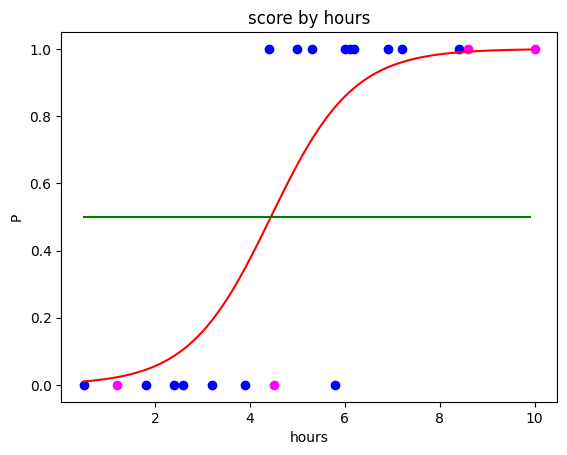

In [62]:
plt.scatter(X_train, y_train, color = 'blue')
plt.scatter(X_test, y_test, color = 'magenta')
plt.plot(X_range, p, color = 'red')
plt.plot(X_range, np.full(len(X_range), 0.5), color = 'green')
plt.title('score by hours')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()